In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
folder = '/home/yutong.zhao/Downloads/google_timeline_export-20231120T152058Z-001/google_timeline_export'

fns = os.listdir(folder)

print(fns)

['2020-07-01_2020-12-31.csv', '2018-01-01_2018-06-30.csv', '2021-07-01_2021-12-31.csv', '2022-01-01_2022-06-30.csv', '2017-01-01_2017-06-30.csv', '2017-07-01_2017-12-31.csv', '2021-01-01_2021-06-30.csv', '2022-07-01_2022-12-31.csv', '2019-07-01_2019-12-31.csv', '2019-01-01_2019-06-30.csv', '2018-07-01_2018-12-31.csv', '2020-01-01_2020-06-30.csv']


In [3]:
for fn in fns:
    df = pd.read_csv(fn)


FileNotFoundError: [Errno 2] No such file or directory: '2020-07-01_2020-12-31.csv'

In [15]:
df = pd.read_csv(folder +'/'+ fns[0])

In [16]:
df

,name,timeBegin,timeEnd,duration,category,distance,latitude,longitude
0,Driving,2020-06-30T23:18:52.001Z,2020-07-01T00:13:07.787Z,3255786,Driving,3140,NaN,NaN
1,Waverley West - B,2020-07-02T14:39:42.190Z,2020-07-02T20:07:57.113Z,19694923,NaN,0,49.793753,-97.183425
2,Driving,2020-07-02T20:07:57.113Z,2020-07-02T20:21:55.007Z,837894,Driving,4644,NaN,NaN
3,SmartCentres Kenaston Common,2020-07-02T20:21:55.007Z,2020-07-02T21:21:05.208Z,3550201,Shopping mall,0,49.822206,-97.206598
4,Driving,2020-07-02T21:21:05.208Z,2020-07-02T21:30:08.492Z,543284,Driving,4532,NaN,NaN
...,...,...,...,...,...,...,...,...
1069,ING Supermarket,2020-12-31T21:15:37.913Z,2020-12-31T21:27:09.431Z,691518,Asian grocery store,0,49.822433,-97.153441
1070,Driving,2020-12-31T21:27:09.431Z,2020-12-31T21:35:26.140Z,496709,Driving,3670,NaN,NaN
1071,Fort Richmond,2020-12-31T21:35:26.140Z,2020-12-31T21:39:57.418Z,271278,NaN,0,49.791028,-97.144460
1072,Driving,2020-12-31T21:39:57.418Z,2020-12-31T21:47:37.752Z,460334,Driving,1445,NaN,NaN


In [6]:
y = df['latitude']
x = df['longitude']

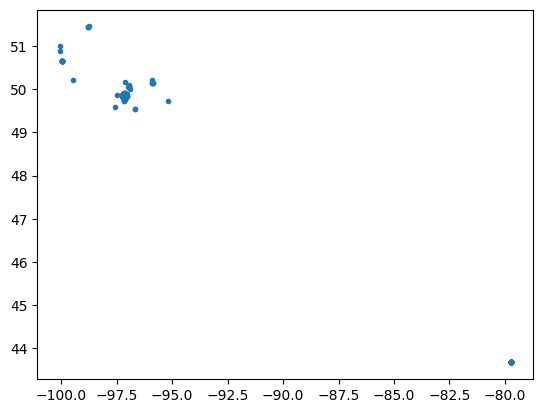

In [7]:
plt.plot(x,y,'.')

In [13]:
import plotly.graph_objects as go

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['latitude'],
        lat = df['longitude'],
        text = df['timeBegin'],
        mode = 'markers',
        # marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='usa',
    )
fig.show()

In [14]:
df

,iata,airport,city,state,country,lat,long,cnt,text
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129,"Chicago O'Hare InternationalChicago, ILArrival..."
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925,"William B Hartsfield-Atlanta IntlAtlanta, GAAr..."
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662,Dallas-Fort Worth InternationalDallas-Fort Wor...
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290,"Phoenix Sky Harbor InternationalPhoenix, AZArr..."
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781,"Denver IntlDenver, COArrivals: 13781"
...,...,...,...,...,...,...,...,...,...
216,EAU,Chippewa Valley Regional,Eau Claire,WI,USA,44.865257,-91.485072,48,"Chippewa Valley RegionalEau Claire, WIArrivals..."
217,DBQ,Dubuque Municipal,Dubuque,IA,USA,42.402959,-90.709167,48,"Dubuque MunicipalDubuque, IAArrivals: 48"
218,RST,Rochester International,Rochester,MN,USA,43.908826,-92.497987,37,"Rochester InternationalRochester, MNArrivals: 37"
219,UTM,Tunica Municipal Airport,Tunica,MS,USA,34.681499,-90.348816,32,"Tunica Municipal AirportTunica, MSArrivals: 32"
